In [93]:
# Import required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [73]:
# Load in the Iris data set

df = pd.read_csv('Iris.csv')
df = df.set_index('Species')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,5.1,3.5,1.4,0.2
Iris-setosa,2,4.9,3.0,1.4,0.2
Iris-setosa,3,4.7,3.2,1.3,0.2
Iris-setosa,4,4.6,3.1,1.5,0.2
Iris-setosa,5,5.0,3.6,1.4,0.2


In [74]:
# Drop Id column
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


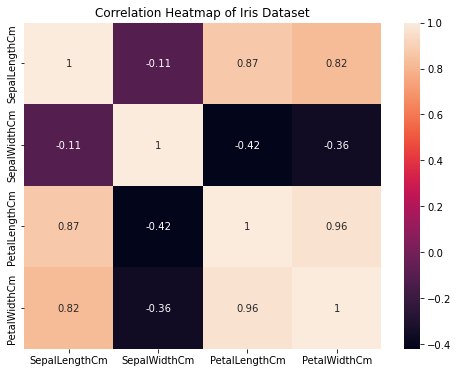

In [75]:
# Create a Correlation Heatmap showing relationships of each Feature

plt.figure(figsize=(8,6))
iris_corr = df.corr()
sns.heatmap(iris_corr, annot=True)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

The Correlation Heatmap prodiuced above shows us how each feature effects one another. The left diagonal containg all 1 values can be ignored as this merely references itself. We see that Sepal width has a extremem negative correlation when referencing Petal Length and Petal Width. What is surprising is that Sepal Length has a strong positive correlation with Petal Width and Petal Length. Sepal Length and Sepal Width are shown to have a negative correlation with one another. This means that from our heatmap; most of the dependencies lie with Petal Length and Petal Width.

### Applying PCA 

#### Standardize the dataset

In [76]:
# Using the Standard scaler library to sclae all Predictor variables

features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
scaled_features = StandardScaler().fit_transform(features)

In [77]:
# Choosing the number of components to be selected

nr_comps = 3
pca = PCA(n_components=nr_comps)

# obtain components
feature_components = pca.fit_transform(features)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(feature_components, index=df.index, columns=['principal component 1','principal component 2',
                                                                  'pricipal component 3'])

# View new dataframe
pca_df.head()

,principal component 1,principal component 2,pricipal component 3
Species,,,
Iris-setosa,-2.684207,0.326607,-0.021512
Iris-setosa,-2.715391,-0.169557,-0.203521
Iris-setosa,-2.889820,-0.137346,0.024709
Iris-setosa,-2.746437,-0.311124,0.037672
Iris-setosa,-2.728593,0.333925,0.096230


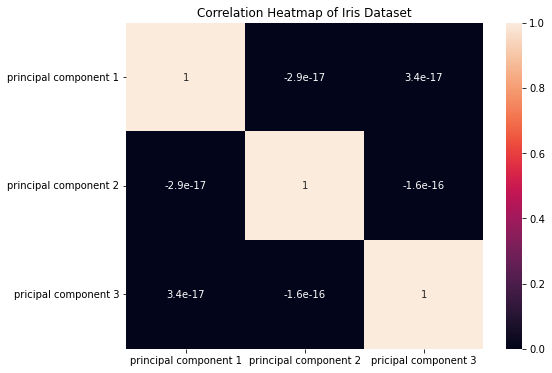

In [78]:
# Create a Correlation Heatmap showing PCA components

plt.figure(figsize=(8,6))
PCA_corr = pca_df.corr()
sns.heatmap(PCA_corr, annot=True)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

Representing The correlation betweeen Original Variables and that of the PCA components

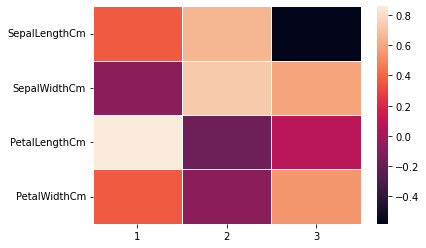

In [79]:
# Create a correlation heatmap between principle components and Original Variables

components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
sns.heatmap(components,linewidth=1)
plt.show()

In [96]:
# Display the PCA covariance

print('Covariance of Feature components:\n',pca.get_covariance())
print('')

# Produce an explanation for each variance

explained_variance=pca.explained_variance_ratio_
print('PCA feature variance explanation:\n',explained_variance)
print('')
# Sum the PCA variance

print('Sum of the PCA variance:\n',pca.explained_variance_ratio_.sum())

Covariance of Feature components:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

PCA feature variance explanation:
 [0.92461621 0.05301557 0.01718514]

Sum of the PCA variance:
 0.9948169145498101


What the above tells us, is that 99.48% of the total information is contained in the 3 principle componmments.

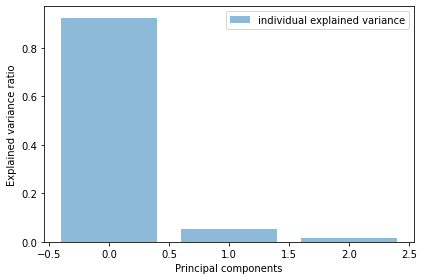

In [81]:
# PLotting a graph representing Variance of Principle Components

plt.figure(figsize=(6, 4))
plt.bar(range(3), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

What we have found from the above analysis, is that using PCA, we can reduce the number of features we have, while still retaining the explanatory variances possible for modelling. Using 3 Principle Components, we find that 99.48% of the required explanatory variances were contained. What this means effectively, is that we only lost 0.52% of accuracy by using 3 components instead of all the features. We can analyze this further by inspecting how each individual component attributes itself to the model. Even if we only use 1 Feature, that 1 feature attributes 92.46% of the total variance needed to create the model. That is impressive considering we discarded 75% of our data for a 8% reduction is accuracy.

#### Representing Classification of data with Different PCA components

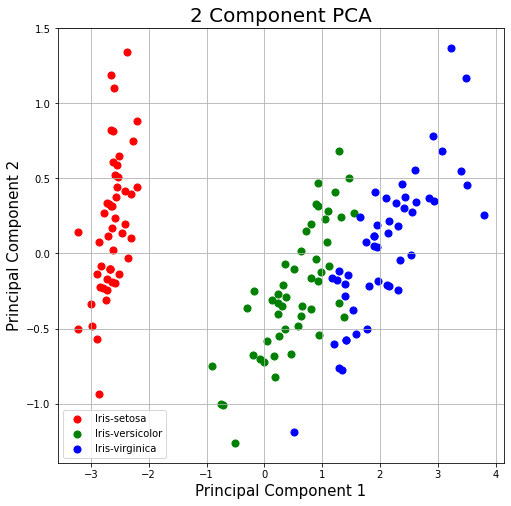

In [86]:
# Create a plot that only contains 2 Principal components 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [99]:
# Create a plot that only shows 1 principle component

pca_one = PCA(n_components = 1)
solo_PrincipalComponent = pca_one.fit_transform(scaled_features)

pca_df = pd.DataFrame(solo_PrincipalComponent, index=df.index, columns=['principal component 1'])

# View new dataframe
pca_df.head()

,principal component 1
Species,
Iris-setosa,-2.264542
Iris-setosa,-2.086426
Iris-setosa,-2.367950
Iris-setosa,-2.304197
Iris-setosa,-2.388777


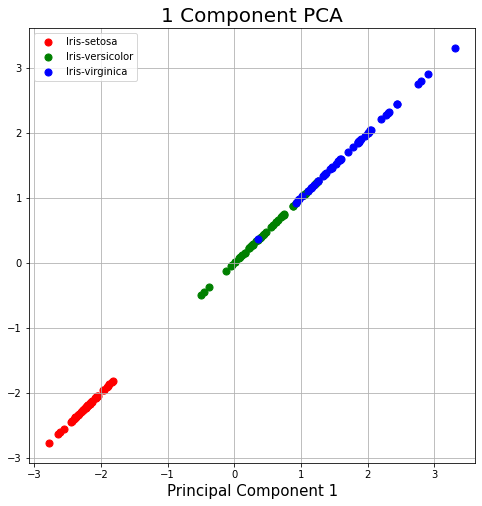

In [102]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_title('1 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1'], pca_df.loc[indicesToKeep, 'principal component 1'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()


Even with just 1 component, We are able to represent how the model classifies our response variable. 

PCA is therefore extremely useful when dealing with large datasets that contain numerous predictor features. It aids in feature reduction while still maintaining relevent accuracy for model prediction. 